# Sheridan Kamal

## DATA 73500 - In Class Activity 3/23/20

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns

df1 = pd.read_excel('http://data.shortell.nyc/files/HumanDevelopment.xlsx', index_col='Country', na_values=['NA'])
df2 = pd.read_excel('http://data.shortell.nyc/files/GenderDevelopment.xlsx', index_col='Country', na_values=['NA'])
df3 = pd.read_excel('http://data.shortell.nyc/files/GenderInequality.xlsx', index_col='Country', na_values=['NA'])
data = pd.concat([df1, df2, df3], axis=1)
data.head()

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,GDI Rank,Gender Development Index (GDI),Human Development Index (Female),...,Estimated Gross National Income per Capita (Male),GII Rank,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male)
Country,,,,,,,,,,,,,,,,,,,,,
Norway,1,0.944,81.6,17.5,12.6,64992,5,1,0.996,0.940,...,72825.0,1,0.067,4.0,7.8,39.6,97.4,96.7,61.2,68.7
Australia,2,0.935,82.4,20.2,13.0,42261,17,2,0.976,0.922,...,50914.0,2,0.110,6.0,12.1,30.5,94.3,94.6,58.8,71.8
Switzerland,3,0.930,83.0,15.8,12.8,56431,6,3,0.950,0.898,...,69077.0,3,0.028,6.0,1.9,28.5,95.0,96.6,61.8,74.9
Denmark,4,0.923,80.2,18.7,12.7,44025,11,4,0.977,0.912,...,51727.0,4,0.048,5.0,5.1,38.0,95.5,96.6,58.7,66.4
Netherlands,5,0.922,81.6,17.9,11.9,45435,9,5,0.947,0.893,...,61641.0,5,0.062,6.0,6.2,36.9,87.7,90.5,58.5,70.6


In [2]:
data.describe()

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,GDI Rank,Gender Development Index (GDI),Human Development Index (Female),...,Estimated Gross National Income per Capita (Male),GII Rank,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male)
count,188.000000,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000,188.000000,161.000000,161.000000,...,177.000000,188.000000,155.000000,178.000000,183.000000,185.000000,162.000000,162.000000,177.000000,177.000000
mean,94.313830,0.692457,71.105319,12.88617,8.110106,17014.808511,0.186170,94.313830,0.930714,0.675050,...,21282.937853,94.313830,0.365884,162.691011,49.474863,20.621622,55.196296,60.417901,52.823729,74.653672
std,54.431652,0.154701,8.383277,2.86827,3.092782,18793.634361,17.326139,54.431652,0.072619,0.168321,...,22971.842956,54.431652,0.191457,215.405045,41.169605,11.602121,30.477781,27.806691,16.250587,8.598361
min,1.000000,0.348000,49.000000,4.10000,1.400000,581.000000,-84.000000,1.000000,0.600000,0.287000,...,689.000000,1.000000,0.016000,1.000000,0.600000,0.000000,0.900000,3.200000,13.500000,44.200000
25%,47.750000,0.573750,65.475000,11.10000,5.575000,3690.500000,-9.000000,47.750000,0.896000,0.541000,...,5279.000000,47.750000,0.184000,14.250000,15.150000,12.400000,27.425000,38.225000,44.500000,68.700000
50%,94.000000,0.724000,73.200000,13.10000,8.500000,10667.000000,1.500000,94.000000,0.950000,0.711000,...,13977.000000,94.000000,0.385000,64.000000,40.900000,19.600000,56.450000,60.300000,53.400000,75.500000
75%,141.250000,0.816500,76.800000,15.02500,10.725000,22800.500000,11.000000,141.250000,0.980000,0.812000,...,28656.000000,141.250000,0.524500,237.500000,71.950000,27.100000,84.350000,87.300000,62.700000,80.300000
max,188.000000,0.944000,84.000000,20.20000,13.100000,123124.000000,47.000000,188.000000,1.030000,0.940000,...,143979.000000,188.000000,0.744000,1100.000000,204.800000,57.500000,100.000000,100.000000,88.100000,95.500000


In [3]:
data.columns

Index(['HDI Rank', 'Human Development Index (HDI)', 'Life Expectancy at Birth',
       'Expected Years of Education', 'Mean Years of Education',
       'Gross National Income (GNI) per Capita',
       'GNI per Capita Rank Minus HDI Rank', 'GDI Rank',
       'Gender Development Index (GDI)', 'Human Development Index (Female)',
       'Human Development Index (Male)', 'Life Expectancy at Birth (Female)',
       'Life Expectancy at Birth (Male)',
       'Expected Years of Education (Female)',
       'Expected Years of Education (Male)',
       'Mean Years of Education (Female)', 'Mean Years of Education (Male)',
       'Estimated Gross National Income per Capita (Female)',
       'Estimated Gross National Income per Capita (Male)', 'GII Rank',
       'Gender Inequality Index (GII)', 'Maternal Mortality Ratio',
       'Adolescent Birth Rate', 'Percent Representation in Parliament',
       'Population with Secondary Education (Female)',
       'Population with Secondary Education (Male)',
 

<IPython.core.display.Javascript object>


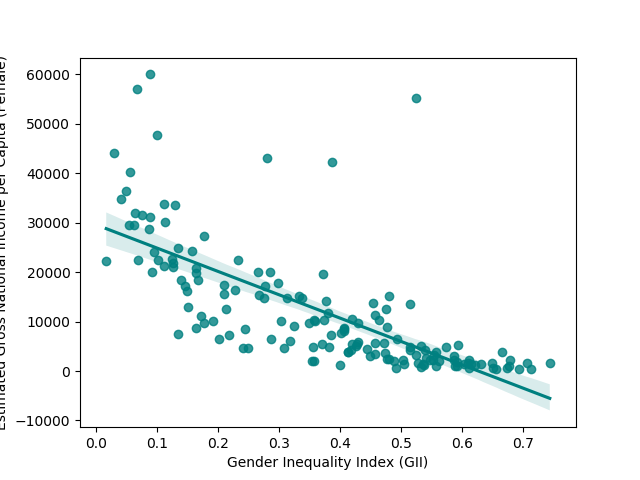

In [7]:
%matplotlib notebook

sns.regplot(x = 'Gender Inequality Index (GII)', y = 'Estimated Gross National Income per Capita (Female)', color = 'teal', data = data, marker = 'o')

As we can see from the above regression plot, the Gender Inequality Index (GII) and the Estimated Gross National Income per Capita (Female) variables have an inverse relationship and are negatively correlated. If we examine the plot more closely, we can see that the relationship between the two follows more of a negative exponential or negative power relationship rather than a linear one.

<IPython.core.display.Javascript object>


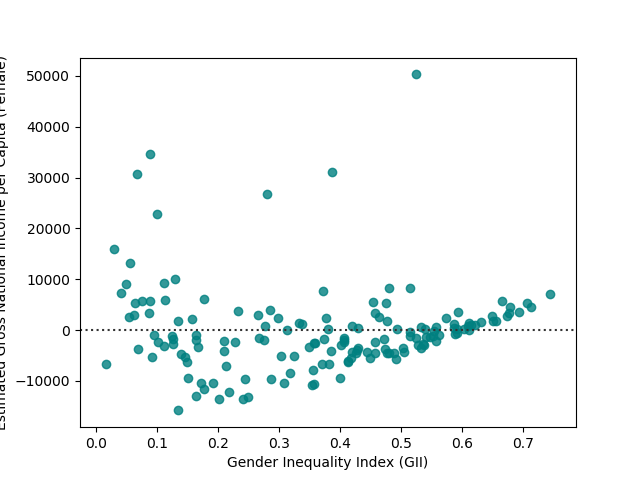

In [5]:
%matplotlib notebook

sns.residplot(x = 'Gender Inequality Index (GII)', y = 'Estimated Gross National Income per Capita (Female)', color = 'teal', data = data)

In [6]:
result = sm.ols(formula = "data['Estimated Gross National Income per Capita (Female)'] ~ data['Gender Inequality Index (GII)'] + data['Mean Years of Education (Female)'] + data['Labour Force Participation Rate (Female)'] + data['Gender Development Index (GDI)'] + data['Life Expectancy at Birth (Female)']", data = data, missing = 'drop').fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                
=======================================================================================================================
Dep. Variable:     data['Estimated Gross National Income per Capita (Female)']   R-squared:                       0.581
Model:                                                                     OLS   Adj. R-squared:                  0.566
Method:                                                          Least Squares   F-statistic:                     39.41
Date:                                                         Mon, 23 Mar 2020   Prob (F-statistic):           3.04e-25
Time:                                                                 17:09:38   Log-Likelihood:                -1543.7
No. Observations:                                                          148   AIC:                             3099.
Df Residuals:                                                              142   BIC:                             3117.
Df Model:                                                                    5                                         
Covariance Type:                                                     nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         1.708e+04   1.65e+04      1.034      0.303   -1.56e+04    4.97e+04
data['Gender Inequality Index (GII)']             -2.65e+04   7229.694     -3.666      0.000   -4.08e+04   -1.22e+04
data['Mean Years of Education (Female)']          1292.3413    431.424      2.996      0.003     439.498    2145.184
data['Labour Force Participation Rate (Female)']   177.1701     56.227      3.151      0.002      66.020     288.320
data['Gender Development Index (GDI)']           -4.871e+04   1.82e+04     -2.675      0.008   -8.47e+04   -1.27e+04
data['Life Expectancy at Birth (Female)']          418.6385    155.976      2.684      0.008     110.304     726.973
==============================================================================
Omnibus:                       97.379   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.602
Skew:                           2.374   Prob(JB):                    1.17e-137
Kurtosis:                      11.928   Cond. No.                     2.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model, we can see that the chosen variables are significant (at the 1% level) in explaining Estimated Gross National Income per Capita (Female). Even though the variables are significant, only 58.1% of the variance in Estimated Gross National Income per Capita (Female) is being explained by the model which means there are other factors not accounted for in our model that would be useful in explaining Estimated Gross National Income per Capita (Female).